## Nicolas Soares dos Santos

# Projeto Final

In [ ]:
#Importação de Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import numpy as np

In [ ]:
#Limpando Dataset

df = pd.read_csv('vgsales.csv')
df['ano'] = pd.to_numeric(df['ano'],errors = 'coerce')
df['nome'] = df['nome'].str.lower().str.strip()
df['plataforma'] = df['plataforma'].str.lower().str.strip()
df['genero'] = df['genero'].str.lower().str.strip()
df['editor'] = df['editor'].str.lower().str.strip()
df.loc[df['ano'] > 2015, 'vendas_global'] = np.nan
df = df.dropna(subset = ['rank','nome','plataforma','ano','genero','vendas_na','vendas_eu','vendas_jp','outras_vendas','vendas_global'])
df['ano'] = df['ano'].apply(int).astype(int)
def remover_acentos(texto):
    if isinstance(texto,str):
        normalized = unicodedata.normalize('NFKD',texto)
        return normalized.encode('ascii','ignore').decode('utf-8')
    return texto

#Retirando acentos e cedilhas dos dados

for coluna in df.columns:
    df[coluna] = df[coluna].apply(remover_acentos)   

- ### Para a limpeza dos dados, foram removidos acentos, cedilhas, espaços desnecessários, linhas com dados ausentes e jogos lançados a partir de 2015, porque tinha poucos jogos oque afetava a análise, além de padronizar a coluna "ano" como números inteiros

## Pergunta 1: O gênero mais vendido no mundo é o mesmo nas regiões EU, NA e JP?

- ### Objetivo: Tem o objetivo de identificar quais gêneros predominam no mercado de jogos

- ### Foram escolhidas as colunas de vendas e gênero, fazendo 4 gráficos para comparar os gêneros mais vendidos em cada região

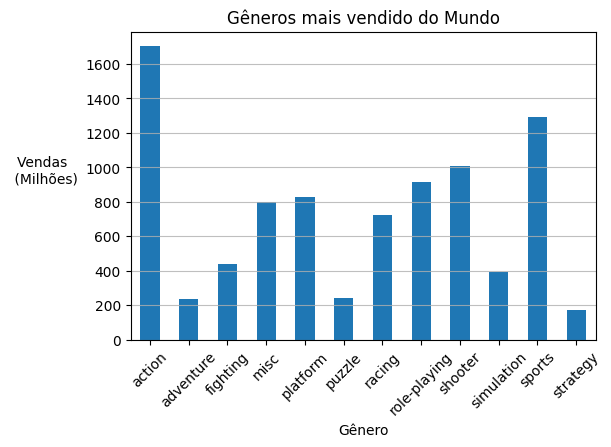

In [ ]:
#Fazendo gráfico Global

mundo = df.groupby('genero')['vendas_global'].sum()

plt.figure(figsize = (6,4))
mundo.plot(kind = 'bar', color = 'tab:blue')
plt.title('Gêneros mais vendido do Mundo')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas (Milhões)')
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis='y', alpha = 0.8)
plt.show()

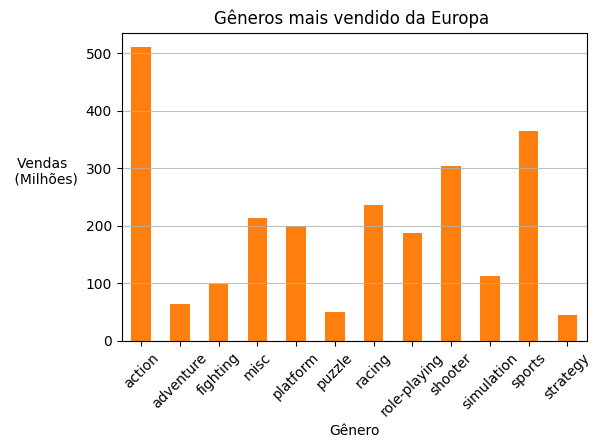

In [ ]:
#Fazendo grafico Europeu

europa = df.groupby('genero')['vendas_eu'].sum()

plt.figure(figsize = (6,4))
europa.plot(kind = 'bar', color = 'tab:orange')
plt.title('Gêneros mais vendido da Europa ')
plt.xlabel('Gênero')
plt.xticks(rotation = 45)
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis='y', alpha = 0.8)
plt.show()

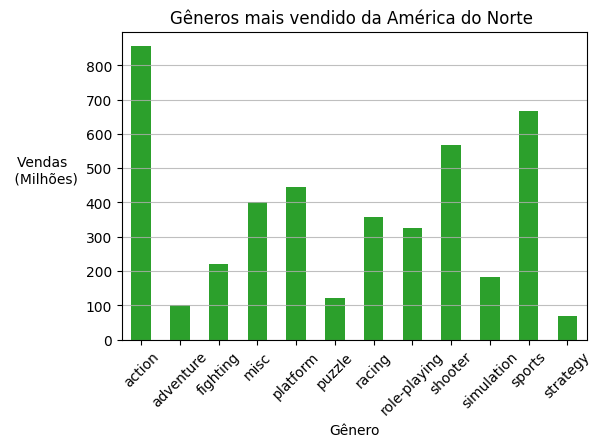

In [ ]:
#Fazendo grafico América do Norte

norte_america = df.groupby('genero')['vendas_na'].sum()

plt.figure(figsize = (6,4))
norte_america.plot(kind = 'bar', color = 'tab:green')
plt.title('Gêneros mais vendido da América do Norte ')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis='y', alpha = 0.8)
plt.show()

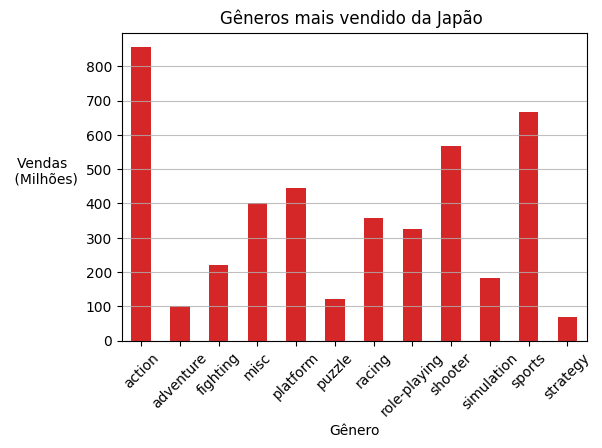

In [ ]:
#Fazendo grafico Japão

japao = df.groupby('genero')['vendas_jp'].sum()

plt.figure(figsize = (6,4))
norte_america.plot(kind = 'bar', color = 'tab:red')
plt.title('Gêneros mais vendido da Japão ')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis='y', alpha = 0.8)
plt.show()

- ### Correlação ou Causalidade: Mesmo sendo regiões diferentes os gráficos são bem semelhantes, mas tem três que se destacam bastante "action, sports, shooter". Nessa situação seria causalidade, porque esses gêneros se destacam tanto dos outros no gráfico, que não faria sentido ter um resultado diferente nos gráficos das demais regiões

### Conclusão: As respostas mostraram que gêneros que se destacam mundialmente são os mesmos nas regiões EUA, Japão e América do Norte, por conta da grande diferença entre um gênero e o outro

## Pergunta 2: Houve um grande aumento de vendas com passar do tempo?

- ### Objetivo: Analizar se houve aumento de vendas ao longo do tempo

- ### Foram usadas as colunas de ano e vendas globais, com um gráfico mostrando as vendas anuais para facilitar a análise do aumento ao longo do tempo

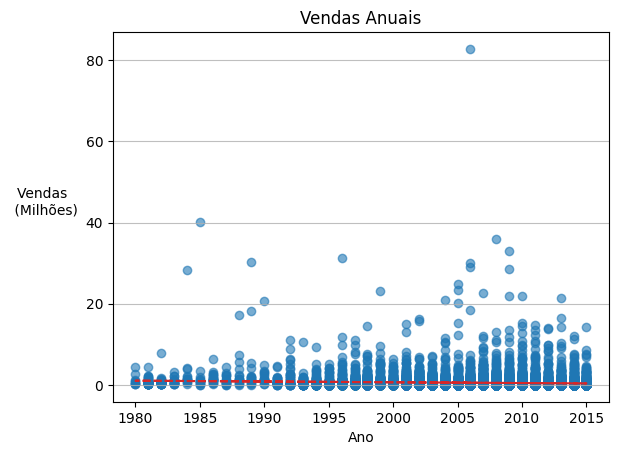

In [226]:
#Fazendo gráfico de vendas anuais

aumento_de_vendas = df.groupby('ano')['vendas_global'].sum()
vendas_globais = df['vendas_global']
anos = df['ano']
plt.scatter(anos, vendas_globais, alpha = 0.6)

coeficientes = np.polyfit(anos, vendas_globais, 1)
funcao_tendencia = np.poly1d(coeficientes)

plt.plot(anos, funcao_tendencia(anos),color = 'tab:red', linestyle = '--')
plt.title('Vendas Anuais')
plt.xlabel('Ano')
plt.ylabel('Vendas \n (Milhões)', rotation = 0, labelpad = 30)
plt.grid(True, axis = 'y', alpha = 0.8)
plt.show()

- ### Correlação ou Causalidade: De acordo com o gráfico, essa situação se encaixa em uma correlação, pois o aumento das vendas é consequência do avanço da tecnologia e do crescimento do mercado, por exemplo, e não apenas pelo passar do tempo

### Conclusão: O gráfico mostrou que com o passar dos anos, as vendas dos jogos tendem a aumentar, não por causa do tempo e sim por outros motivos